# Analysis on California Motor Vehicle Traffic Collisions during 2019

In [1]:
from IPython.core.display import Image
import pandas as pd
import plotly.graph_objects as go

## Section 3: Geographical Factor Analysis - Locations & Population

Next, we examined the impact of some geographical factors on traffic collisions. Given that our dataset contains plenty of county-level data on traffic collisions statistics, we used the python `plotly` package to create a few choropleth maps to illustrate how different metrics distribute across different counties in California.

In [2]:
def plot_choroplethmap(counties, fips, value, value_min, value_max, text, title):
    fig = go.Figure(go.Choroplethmapbox(geojson=counties, locations=fips, z=value,
                                    colorscale="Viridis", zmin=value_min, zmax = value_max,
                                    marker_opacity=0.8, marker_line_width=1, 
                                    text=text))

    fig.update_layout(mapbox_style="carto-positron",
                      mapbox_zoom=4.3, mapbox_center = {"lat": 37.5, "lon": -120})
    fig.update_layout(margin={"r":150,"t":30,"l":150,"b":0}, 
                      title={"text":title})
    fig.show()

In [4]:
# Load in the pandas dataframe generated in the County_Analysis Notebook
county_data_2019 = pd.read_csv("data/county_data_2019.csv", dtype={"fips":str}, index_col=0)

# Load in the json object that stores geometrical shape of each county
counties = json.load(open("data/CA-flips.json"))

Displayed below is the first 10 rows of the main dataframe that contains all of the county-level data that this part of the analysis depends on. The dataframe was collected in 2019. Each row of the dataframe corresponds to a county in California county (58 in total). Here's an overview of what each column represents:

- `County`: name of the county
- `fips`: the fips code that uniquely identify each county in the US
- `Population`: the population of the county in 2019
- `Total Crashes`: the total number of traffic collisions
- `Total Fatal`: the number of people killed in collisions
- `Total Injury`: the number of people injured in collisions
- `Alcohol Involved Crashes`: the number of alcohol-involved collisions
- `Alcohol Involved Fatal`: the number of people killed in alcohol-involved collisions
- `Alcohol Involved Injury`: the number of people injured in alcohol-involved collisions
- `Crashes per 1000 capita`: the number of collisions per 1000 capita
- `Overall Fatal Rate`: the overall ratio of people killed to total number of collisions
- `Alcohol Involved Fatal Rate`: the overall ratio of people killed to total number of collisions


In [5]:
# Display the first 10 rows of the county dataset
county_data_2019.head(10)

,County,fips,Population,Total Crashes,Total Fatal,Total Injury,Alcohol Involved Crashes,Alcohol Involved Fatal,Alcohol Involved Injury,Crashes per 1000 capita,Overall Fatal Rate,Alcohol Involved Fatal Rate
0,Alameda,06001,1668965,22768,96,10441,469,28,655,13.641988,0.421644,5.970149
1,Alpine,06003,1123,77,2,66,1,0,4,68.566340,2.597403,0.000000
2,Amador,06005,37724,521,16,276,29,4,38,13.810837,3.071017,13.793103
3,Butte,06007,214532,2226,34,1262,130,9,143,10.376074,1.527403,6.923077
4,Calaveras,06009,44403,598,11,305,44,4,45,13.467558,1.839465,9.090909
5,Colusa,06011,22045,352,12,205,22,1,21,15.967340,3.409091,4.545455
6,Contra Costa,06013,1147269,12195,77,5982,383,27,492,10.629591,0.631406,7.049608
7,Del Norte,06015,27207,285,11,217,20,1,19,10.475245,3.859649,5.000000
8,El Dorado,06017,188818,1644,29,861,96,11,103,8.706797,1.763990,11.458333
9,Fresno,06019,1018437,7848,135,4247,297,34,305,7.705926,1.720183,11.447811


### 3.1 Collision Count by County

Firstly, we think it would be nice to get a general idea of the geographical distribution of traffic collisions across the counties. The choroplethmap below displays the total number of collisions that happened in each county in 2019.

In [7]:
plot_choroplethmap(counties=counties, 
                   fips=county_data_2019["fips"], 
                   value=county_data_2019["Total Crashes"].tolist(), 
                   value_min=0, 
                   value_max=20000, 
                   text=county_data_2019["County"].tolist(), 
                   title="Collision Count by County in California")

Looking at the plot, the number of collisions tend to be higher in states with larger population. This makes sense because larger population usually means larger driving population, which then leads to more accidents. This is illustrated by the scatter plot below, which plots the log of collision count against the log of population for each county. As earlier speculated, there's a clear positive correlation between the two.

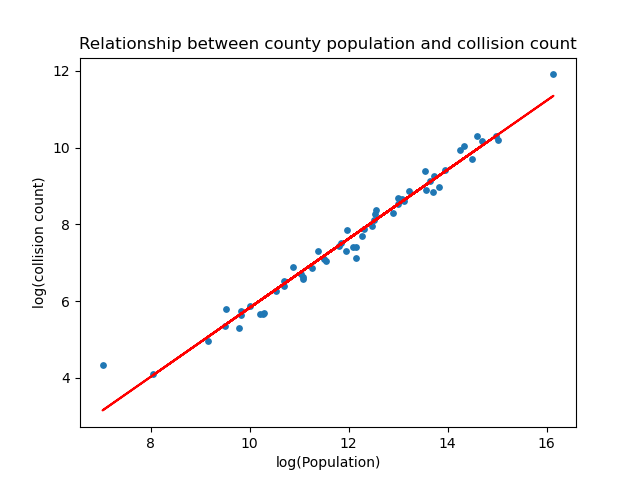

In [8]:
Image("figures/scatter3_1.png")

### 3.2 Collision Frequency by County

Since it's expected for total collision count to go up as population increases, we wanted to take away the effect of population. As a result, we created a second choroplethmap to show the the collision frequency of each county, with frequency defined as the **number of collision per 1000 capita** in each county.

In [7]:
plot_choroplethmap(counties=counties, 
                   fips=county_data_2019["fips"], 
                   value=county_data_2019["Crashes per 1000 capita"].tolist(), 
                   value_min=5, 
                   value_max=20, 
                   text=county_data_2019["County"].tolist(), 
                   title="Collision Count per 1000 Capita by County in California")

Surprisingly, the distribution of collision frequency is quite different from that of the collision count. We can see that the high-population counties no longer stand out in this plot, and high frequencies tend to have shifted towards the central and even northern counties. However, the choroplethmap is not exactly clear on the underlying pattern, so we further plotted the relationship between population and collision frequency in a scatter plot, as shown below.

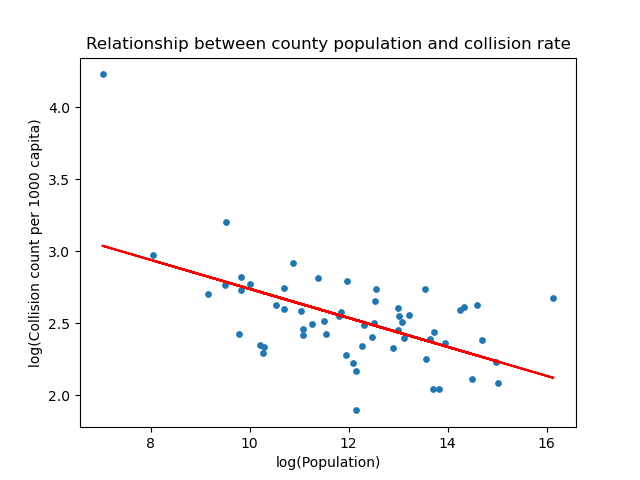

In [8]:
Image("figures/scatter3_2.png")

In fact, we can see that population and collision frequency are negatively correlated, which is the exact opposite of what we initially expected! We would naturally think more densely populated area will have higher chance of collisions but apparently this is not the case. One of the possible explanation of this phenomenon could be that in densely populated regions people are forced to drive slower while in sparsely populated areas people will drive more recklessly because there are less cars on the road.

### 3.2 Collision Frequency by County

Following up on the collision frequency of each county, we decided to further examined how population relates to how fatal the collisions are. Below is a third choroplethmap on the fatal rate of collision in each county, where the **fatal rate is calculated by dividing the number of people killed in collision in each county by the total number of collisions that happened in the county**.

In [9]:
plot_choroplethmap(counties=counties, 
                   fips=county_data_2019["fips"], 
                   value=county_data_2019["Overall Fatal Rate"].tolist(), 
                   value_min=0, 
                   value_max=3, 
                   text=county_data_2019["County"].tolist(), 
                   title="Collision Fatal Rate by County in California")

Once again, we do not see highly populated county such as Alameda, Los Angeles, and San Diego county stand out at all in fatal rate. Instead, similar to the collision frequency in the previous plot, sparsely populated counties tend to have more deadly collisions on average. Once again, this can come down to the difference in driving speed and driving habit between urban and rural areas.

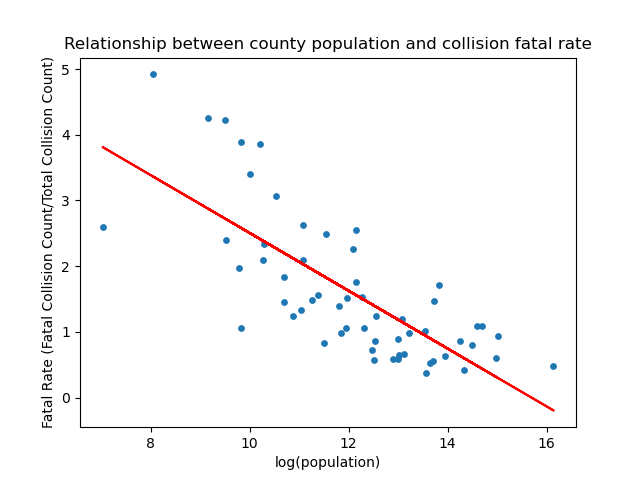

In [10]:
Image("figures/scatter3_3.png")

As expected, the scatter plot shows a negative correlation between population and fatal rate.

## Section 4: Alcohol

Lastly, we want to address our curiosity on, although commonly agreed, how much alcohol usage actually impacts traffic collision. We created a boxplot to compare side-by-side the distribution of the overall fatal rate against the fatal rate of only alcohol-involved collisions. From the plot, we can see the overall FR averages slightly over 1 percent while its counterpart averages around 8 percent. Our result confirmed the common belief: drinking alcohol greatly increases the severity of the collisions, which makes sense because intoxicated drivers are usually way out of control of the situation.

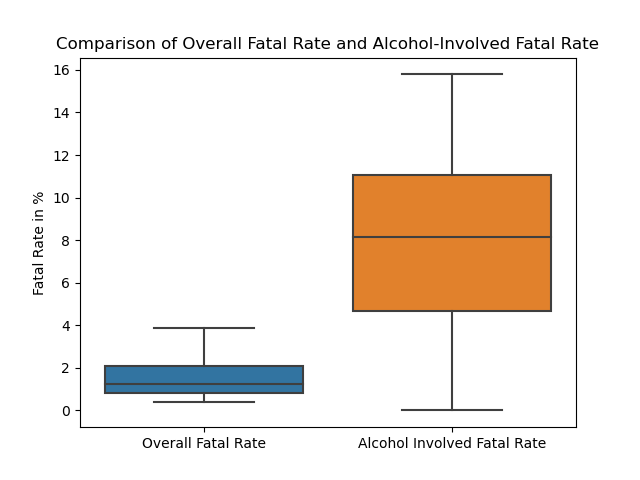

In [11]:
Image("figures/boxplot3_4.png")

## Author Contributions

Nick:
Leah: created and completed the makefile, wrote part of README and day_of_month analysis
Jeffrey: created county and alcohol analysis, compiled the main notebook